In [16]:
#引入資料:2021年消防水域救援統計

import chardet 
import pandas as pd 
#當無法正確讀取檔案時，需使用 chardet 來修正解碼方式
#'rb':二進制讀取模式
with open('2021WaterSafety.csv','rb') as f:
    result = chardet.detect(f.read())
#encoding 即使用chardet 剛剛檢測到的編碼方式進行解碼
#Data_0 : Raw Data 
Data_0 = pd.read_csv('2021WaterSafety.csv',encoding = result['encoding'],header = 0 ,index_col = 0)
#修正
Data_0 = Data_0.rename(columns ={'年齡(歲)' : 'age','溺水\n結果':'Result'})
Data_0['游泳能力'] = Data_0['游泳能力'].replace('不詳','unknown').replace('不會','No').replace('會','Yes')
Data_0['性別'] = Data_0['性別'].replace('不詳','unknown')
Data_0['溺者身分'] = Data_0['溺者身分'].replace('不詳','unknown')

Data_0

,縣市別,年,月,日,時,分,溺水地點或附近地標\n(水域、溪流名稱),水域種類,溺水原因,Result,性別,age,溺者身分,游泳能力
編號,,,,,,,,,,,,,,
1,臺北市,2021,1,4,19,34,福林橋(河濱內雙溪街對面側),溪河,自殺,獲救,男,18,高中,unknown
2,臺北市,2021,1,5,14,41,基隆河(麥帥一橋),溪河,自殺(員警報案疑似輕生現場留有機車，搜尋後未發現，經家屬同意後結束搜索。),失蹤,男,36,社會人士(小於65歲),unknown
3,臺北市,2021,1,11,22,25,基隆河(5號水門),溪河,浮屍,死亡,男,40,社會人士(小於65歲),unknown
4,臺北市,2021,1,14,13,29,基隆河(觀山河濱公園，近觀山173號路燈),溪河,浮屍,死亡,男,60,社會人士(小於65歲),unknown
5,臺北市,2021,1,17,6,46,迪化汙水處理場旁河堤外(臺北市大同區酒泉街235號),溪河,浮屍,死亡,男,50,社會人士(小於65歲),unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,高雄港,2021,11,10,5,51,高雄港珊瑚群館光榮碼頭,碼頭,自殺(感情糾紛),獲救,男,24,社會人士(小於65歲),No
923,高雄港,2021,11,10,5,51,高雄港珊瑚群館光榮碼頭,碼頭,自殺(感情糾紛),獲救,女,25,社會人士(小於65歲),No
924,高雄港,2021,12,10,2,55,高雄港12號碼頭(海音館),碼頭,浮屍(不詳),死亡,女,24,社會人士(小於65歲),unknown


In [38]:
#問題一 : 請找出水域救援次數最多的月份。
D0_month_max = Data_0.groupby('月').size()
D0_month_max.to_csv('D0_month_max')
D0_month_max = pd.read_csv('D0_month_max').rename(columns ={'0':'次數'})
D0_month_max.set_index('月',inplace =True)
print('水域救援次數最多的月份為',D0_month_max['次數'].idxmax(),'月份')
print('其次數為',D0_month_max['次數'].max(),'次')

水域救援次數最多的月份為 10 月份
其次數為 187 次


        counts
Result        
失蹤          25
死亡         544
獲救         357


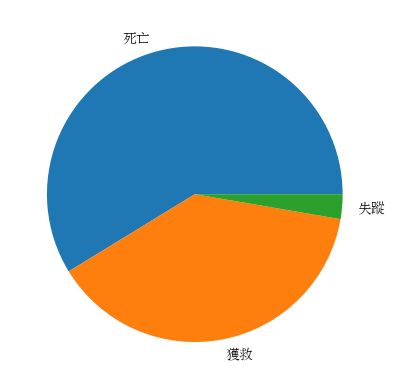

In [49]:
#問題二:請寫出2021年溺水結果(Result)的結果，並以pie chart表示。
#整理出Result的數據
D0_result_counts = Data_0.groupby('Result').size()
D0_result_counts.to_csv('D0_result_counts')
D0_result_counts = pd.read_csv('D0_result_counts').rename(columns = {'counts' : 'Result','0':'counts'})
D0_result_counts.set_index('Result',inplace = True)
print(D0_result_counts)
#整理出Result的比率
D0_result_percent = Data_0['Result'].value_counts(normalize = True) * 100 
D0_result_percent.to_csv('D0_result_percent')
D0_result_percent = pd.read_csv('D0_result_percent').rename(columns = {'Unnamed: 0' : 'Result','Result':'Percent'})
D0_result_percent.set_index('Result',inplace = True)
#製圖
%matplotlib inline
import matplotlib.pyplot as plt
#中文字需要下面這一行轉譯
plt.rcParams['font.family'] = ['Simsun'] 
plt.pie(D0_result_percent['Percent'],labels = D0_result_percent.index)
plt.show()

縣市別
新北市    206
臺北市    164
高雄市    112
臺南市     70
彰化縣     46
Name: 次數, dtype: int64


<BarContainer object of 5 artists>

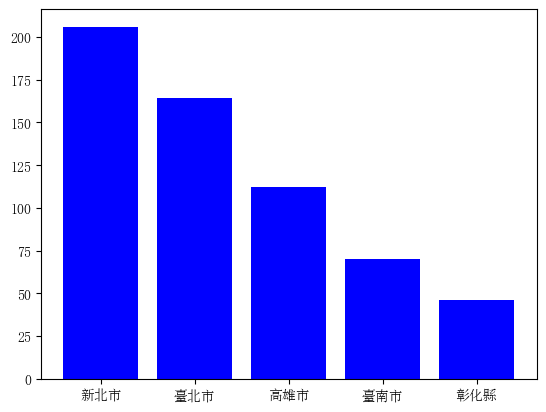

In [91]:
#問題三 : 請繪製各縣市救援案件前五名長條圖，並寫出救援次數前五名縣市別的救援數
#整理縣市別數據
D0_cities_counts = Data_0.groupby('縣市別').size()
D0_cities_counts.to_csv('D0_cities_counts')
D0_cities_counts = pd.read_csv('D0_cities_counts').rename(columns ={'0' : '次數'})
D0_cities_counts.set_index('縣市別',inplace = True)
print(D0_cities_counts['次數'].nlargest(5))
#製圖
plt.bar(D0_cities_counts['次數'].nlargest(5).index,D0_cities_counts['次數'].nlargest(5),color = 'blue' )


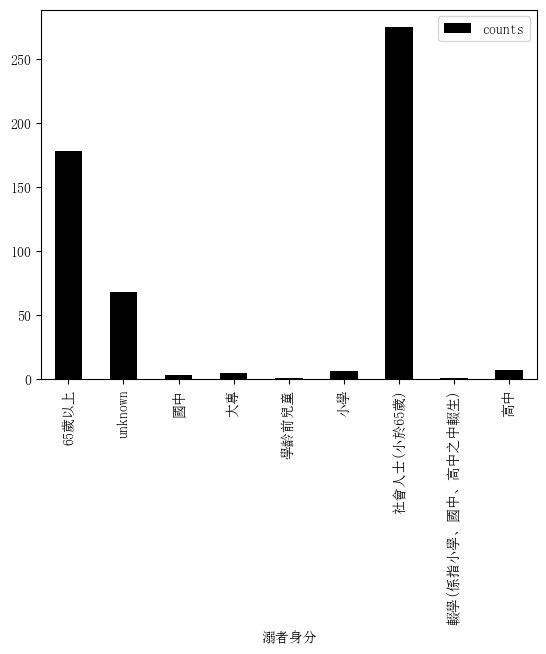

死亡身分最少是 學齡前兒童
其人數為 1 人


In [244]:
#問題四 : 請繪製不同身分別溺水死亡長條圖並顯示死亡人數最少的身分別為?有幾人?

#篩選出死亡的表格
filter_death = Data_0['Result'] == '死亡'
D0_filtered_death = Data_0.loc[filter_death]
D0_filtered_death
#整理死亡身分別個數
D0_identity_death_counts = D0_filtered_death.groupby('溺者身分').size()
D0_identity_death_counts.to_csv('D0_identity_death_counts')
D0_identity_death_counts = pd.read_csv('D0_identity_death_counts').rename(columns ={'0' : 'counts'})
D0_identity_death_counts
#繪製折線圖
D0_identity_death_counts.plot(x='溺者身分',y='counts',kind ='bar',color='black')
plt.show()

D0_identity_death_counts.set_index('溺者身分',inplace = True)
print('死亡身分最少是',D0_identity_death_counts['counts'].idxmin())
print('其人數為',D0_identity_death_counts['counts'].min(),'人')

In [100]:
#問題五 請問男女獲救率各為多少 ? 
#算出男生的獲救率
filter_male = Data_0['性別'] == '男'
D0_filtered_male = Data_0.loc[filter_male]
D0_filtered_male
D0_male_result_percent = D0_filtered_male['Result'].value_counts(normalize = True) * 100
#比照辦理算出女生的獲救率
filter_female = Data_0['性別'] == '女'
D0_filtered_female = Data_0.loc[filter_female]
D0_filtered_female
D0_female_result_percent = D0_filtered_female['Result'].value_counts(normalize = True) * 100
D0_female_result_percent['獲救']
print('男性獲救率為',round(D0_male_result_percent['獲救'],2),'%')
print('女性獲救率為',round(D0_female_result_percent['獲救'],2),'%')

男性獲救率為 37.3 %
女性獲救率為 41.7 %


In [197]:
#問題六 請問不同水域種類的死亡率為何?
print('水域種類有:')
for areatype in Data_0['水域種類'].unique():
    print(areatype)

filter_溪河 = Data_0['水域種類'] == '溪河'
D0_filtered_river = Data_0.loc[filter_溪河]
D0_filtered_river
D0_river_result_percent = D0_filtered_river['Result'].value_counts(normalize = True) * 100
print('溪河獲救率為',round(D0_river_result_percent['獲救'],2),'%')

filter_近海_海岸線1公里內 = Data_0['水域種類'] == '近海(海岸線1公里內)'
D0_filtered_近海 = Data_0.loc[filter_近海_海岸線1公里內]
D0_filtered_近海
D0_近海_result_percent = D0_filtered_近海['Result'].value_counts(normalize = True) * 100
print('近海獲救率為',round(D0_近海_result_percent['獲救'],2),'%')

filter_圳溝 = Data_0['水域種類'] == '圳溝'
D0_filtered_圳溝 = Data_0.loc[filter_圳溝]
D0_filtered_圳溝
D0_圳溝_result_percent = D0_filtered_圳溝['Result'].value_counts(normalize = True) * 100
print('圳溝獲救率為',round(D0_圳溝_result_percent['獲救'],2),'%')

filter_碼頭 = Data_0['水域種類'] == '碼頭'
D0_filtered_碼頭 = Data_0.loc[filter_碼頭]
D0_filtered_碼頭
D0_碼頭_result_percent = D0_filtered_碼頭['Result'].value_counts(normalize = True) * 100
print('碼頭獲救率為',round(D0_碼頭_result_percent['獲救'],2),'%')

filter_湖潭 = Data_0['水域種類'] == '湖潭'
D0_filtered_湖潭 = Data_0.loc[filter_湖潭]
D0_filtered_湖潭
D0_湖潭_result_percent = D0_filtered_湖潭['Result'].value_counts(normalize = True) * 100
print('湖潭獲救率為',round(D0_湖潭_result_percent['獲救'],2),'%')

filter_池塘 = Data_0['水域種類'] == '池塘'
D0_filtered_池塘 = Data_0.loc[filter_池塘]
D0_filtered_池塘
D0_池塘_result_percent = D0_filtered_池塘['Result'].value_counts(normalize = True) * 100
print('池塘獲救率為',round(D0_池塘_result_percent['獲救'],2),'%')

filter_魚塭 = Data_0['水域種類'] == '魚塭'
D0_filtered_魚塭 = Data_0.loc[filter_魚塭]
D0_filtered_魚塭
D0_魚塭_result_percent = D0_filtered_魚塭['Result'].value_counts(normalize = True) * 100
print('魚塭獲救率為',round(D0_魚塭_result_percent['獲救'],2),'%')

filter_外海_海岸線1公里以外 = Data_0['水域種類'] == '外海(海岸線1公里以外)'
D0_filtered_外海 = Data_0.loc[filter_外海_海岸線1公里以外]
D0_filtered_外海
D0_外海_result_percent = D0_filtered_外海['Result'].value_counts(normalize = True) * 100
print('外海獲救率為',round(D0_外海_result_percent['獲救'],2),'%')

filter_游泳池 = Data_0['水域種類'] == '游泳池'
D0_filtered_游泳池 = Data_0.loc[filter_游泳池]
D0_filtered_游泳池
D0_游泳池_result_percent = D0_filtered_游泳池['Result'].value_counts(normalize = True) * 100
print('游泳池獲救率為',round(D0_游泳池_result_percent['獲救'],2),'%')

filter_水庫 = Data_0['水域種類'] == '水庫'
D0_filtered_水庫 = Data_0.loc[filter_水庫]
D0_filtered_水庫
D0_水庫_result_percent = D0_filtered_水庫['Result'].value_counts(normalize = True) * 100
print('水庫獲救率為', 50 -  D0_游泳池_result_percent['死亡'],'%') 
print(D0_水庫_result_percent)
#水庫有點瑕疵，需要調整，因為獲救率是0%所以沒有'獲救'這個索引可以搜尋... 然後明明是100%卻是用50去減才會是0)

filter_其他 = Data_0['水域種類'] == '其他'
D0_filtered_其他 = Data_0.loc[filter_其他]
D0_filtered_其他
D0_其他_result_percent = D0_filtered_其他['Result'].value_counts(normalize = True) * 100
print('其他獲救率為',round(D0_其他_result_percent['獲救'],2),'%')
#要怎麼聰明一點把這個打出來呢? 

水域種類有:
溪河
湖潭
池塘
碼頭
魚塭
近海(海岸線1公里內)
游泳池
其他
外海(海岸線1公里以外)
圳溝
水庫
溪河獲救率為 45.91 %
近海獲救率為 44.94 %
圳溝獲救率為 13.1 %
碼頭獲救率為 41.67 %
湖潭獲救率為 21.95 %
池塘獲救率為 12.12 %
魚塭獲救率為 7.41 %
外海獲救率為 60.0 %
游泳池獲救率為 50.0 %
水庫獲救率為 0.0 %
死亡    100.0
Name: Result, dtype: float64
其他獲救率為 14.29 %


In [245]:
#問題七 請問65歲以上老人溺水原因前三名為何? 最小宗為? 

filter_65y = Data_0['溺者身分'] == '65歲以上'
D0_filtered_65y = Data_0.loc[filter_65y]
#僅採取前兩字為主
D0_65y_reasons = D0_filtered_65y.groupby(D0_filtered_65y['溺水原因'].str[:2]).size()
D0_65y_reasons.to_csv('D0_65y_reasons')
D0_65y_reasons = pd.read_csv('D0_65y_reasons').rename(columns ={'0':'counts'})
D0_65y_reasons.set_index('溺水原因',inplace = True)
print('65歲以上老人溺水最大宗為',D0_65y_reasons['counts'].idxmax(),'，共有',D0_65y_reasons['counts'].max(),'起')
print('65歲以上老人溺水第二大宗為',D0_65y_reasons['counts'].nlargest(2).idxmin(),'，共有',D0_65y_reasons['counts'].nlargest(2).iloc[-1],'起')
print('65歲以上老人溺水第三大宗為',D0_65y_reasons['counts'].nlargest(3).idxmin(),'，共有',D0_65y_reasons['counts'].nlargest(3).iloc[-1],'起')
print('65歲以上老人溺水最小宗為',D0_65y_reasons['counts'].idxmin(),'，共有',D0_65y_reasons['counts'].min(),'起')


65歲以上老人溺水最大宗為 浮屍 ，共有 112 起
65歲以上老人溺水第二大宗為 自殺 ，共有 51 起
65歲以上老人溺水第三大宗為 失足 ，共有 19 起
65歲以上老人溺水最小宗為 救人 ，共有 1 起


In [5]:
#問題八 請問夏季(6~9月)學生(國小~大專)水域救援次數多少次 ? 獲救率為何? 獲救者是否具備游泳能力 ? 
filter_summer_vacation = (Data_0['月'] == 6)|(Data_0['月'] == 7) | (Data_0['月'] == 8)|(Data_0['月'] == 9)
D0_filtered_Sum = Data_0.loc[filter_summer_vacation]
filter_std = (D0_filtered_Sum['溺者身分'] == '小學') | (D0_filtered_Sum['溺者身分'] == '國中')|(D0_filtered_Sum['溺者身分'] == '高中')|(D0_filtered_Sum['溺者身分'] == '大專')
D0_filtered_Sum_Std = D0_filtered_Sum.loc[filter_std]

filter_saved = D0_filtered_Sum_Std['Result'] == '獲救' 
print('夏季學生水域救援次數共',D0_filtered_Sum_Std['年'].count(),'次')
D0_filtered_Sum_Std_Saved = D0_filtered_Sum_Std['Result'].value_counts(normalize = True) * 100
print('獲救率為',D0_filtered_Sum_Std_Saved['獲救'],'%')
D0_filtered_Sum_Std_Saved_swim = D0_filtered_Sum_Std.loc[filter_saved] 
D0_filtered_Sum_Std_Saved_swim = D0_filtered_Sum_Std_Saved_swim['游泳能力'].value_counts(normalize = True) * 100
print('其中有',round(D0_filtered_Sum_Std_Saved_swim['Yes'],2),'%的學生會游泳')



夏季學生水域救援次數共 14 次
獲救率為 50.0 %
其中有 28.57 %的學生會游泳


In [17]:
#問題九 請問壯年(30-64)游泳能力與獲救率的關係 ? 
#調整數據
Data_0['age'] = Data_0['age'].replace('不詳','0')
Data_0['age'] = Data_0['age'].replace('待查','0')
num_str = Data_0['age']
num_str = num_str.str.split()
num_str = num_str.apply(lambda x : [int(i) for i in x])

#
filter_adult = (Data_0['age'] >= 30) & (Data_0['age']<= 64)

print('會游泳且獲救的比率為','其平均年齡落在', )
print('會游泳但死亡的比率為','其平均年齡落在', )
print('不會游泳但獲救的比率為','其平均年齡落在', )
print('不會游泳且死亡的比率為','其平均年齡落在', )


D0_filtered_std = Data_0.loc[filter_student]
D0_filtered_std

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
#問題十
